## Image classification with FASHION MNIST------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

#### About The Dataset

Dataset information Fashion MNIST was introduced in August 2017, by research lab at Zalando Fashion. Its goal is to serve as a new benchmark for testing machine learning algorithms, as MNIST became too easy and overused. While MNIST consists of handwritten digits, Fashion MNIST
is made of images of 10 different clothing objects. Each image has the following properties:

Its size is 28 × 28 pixels.

Rotated accordingly and represented in grayscale, with integer values ranging from 0 to 255.

Blank space represented by black color and having value 0.

In the dataset, we distinguish between the following clothing objects:

T-shirt/Top

Trousers

Pullover

Dress

Coat

Sandal

Shirt

Sneaker

Bag

Ankle Boot

In [2]:
data_fash = pd.read_csv("fashion-mnist_train.csv")
data_fash_test = pd.read_csv("fashion-mnist_test.csv")
#data_fash.dtypes

#### Data Exploration


In [3]:

print('data is a %s' % type(data_fash))
print('column names %s' % (data_fash.columns))
print('=========================================================================')
print('data has %d rows and %d columns' % data_fash.shape)
print('Basic Statistics about data%s' % ('_'*50))
print(data_fash.describe())
print('')
print('Sample of data%s' % ('_'*50))
print('data type of the data' % data_fash.dtypes)
print('=========================================================================')
print(data_fash.head().T)


# data_fash.shape
# data_fash.columns
# data_fash.describe()
# data_fash.head().T


data is a <class 'pandas.core.frame.DataFrame'>
column names Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
data has 60000 rows and 785 columns
Basic Statistics about data__________________________________________________
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000

Labels 

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [4]:
data_fash_test.shape

(10000, 785)

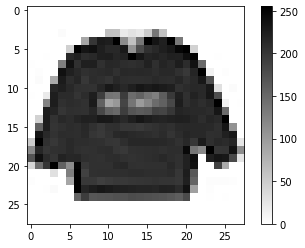

In [5]:
#to view the image
imag = data_fash.iloc[0:1,1:]
imag = np.array(imag)
imag = np.reshape(imag, (28,28,1))
plt.imshow(imag,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

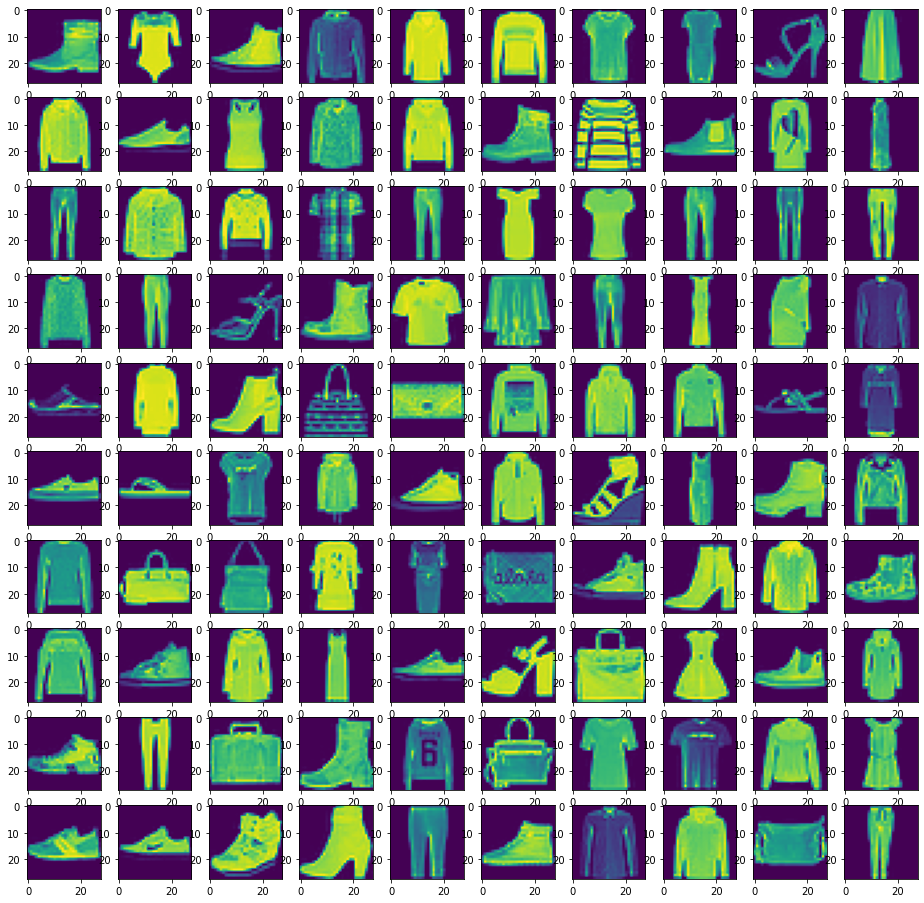

In [6]:
rows = 10
columns = 10
fig,ax = plt.subplots(rows,columns,figsize = (16,16))
ax = ax.ravel()
n_train = len(data_fash)
for i in range(0,10*10):
    index = np.random.randint(0, n_train)
    img = data_fash.iloc[index,1:]
    img = np.array(img)
    ax[i].imshow(img.reshape(28,28,1))
    

#### Preprocessing the data



In [7]:
#creating arrays of data
train_data_fash = np.array(data_fash, dtype = 'float32')
test_data_fash = np.array(data_fash_test, dtype='float32')

In [8]:
X_train = train_data_fash[:,1:]/255

y_train = train_data_fash[:,0]

X_test= test_data_fash[:,1:]/255

y_test=test_data_fash[:,0]

In [9]:
X_train.shape , y_train.shape

((60000, 784), (60000,))

In [10]:
X_test.shape

(10000, 784)

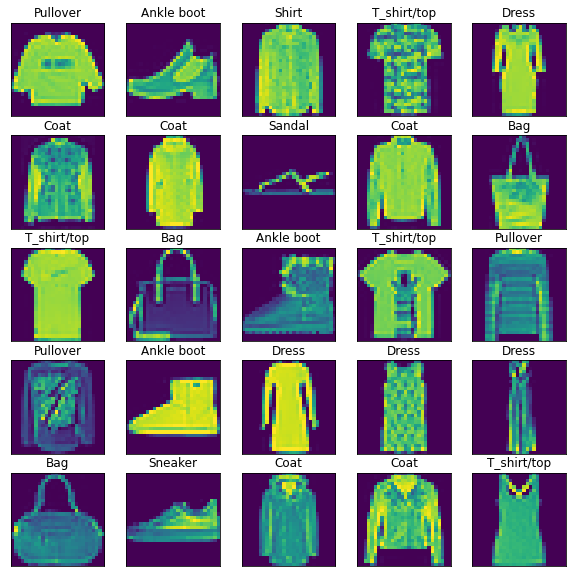

In [11]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

We split our training data into train and validate datasets, in order to train our model and validate it using the validation data set to avoid overfitting before testing the model on the test datasets which is as real-world data for our model.



In [12]:
X_train,X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
X_val.shape

(12000, 784)

Three basic components to define a basic convolutional neural network.

The Convolutional Layer
The Pooling layer
The Output layer¶

Create the Convolutional Neural Networks (CNN)¶

Define model

Compile model

Train model

First of all let us define the shape of the image before we define the model. Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [15]:
# tuple
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
X_train = X_train.reshape(X_train.shape[0], * (image_shape))
X_test = X_test.reshape(X_test.shape[0], * (image_shape))
X_val = X_val.reshape(X_val.shape[0], * (image_shape))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
# The model we will build is sequential, going layer by layer.
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

The first layer in this network, keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

Because we are dealing with the classification problem, the final layer
uses softmax activation to get class probabilities. As class probabilities follow a certain distribution, cross-entropy indicates the distance from networks preferred distribution.

Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [20]:
%%time
# Fit the model on a training set
history = cnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs = 40,
    verbose=1,
    batch_size = 1000)

Epoch 1/40
48/48 [==============================] - 83s 2s/step - loss: 0.7614 - accuracy: 0.7412 - val_loss: 2.4314 - val_accuracy: 0.1748
Epoch 2/40
48/48 [==============================] - 83s 2s/step - loss: 0.4108 - accuracy: 0.8489 - val_loss: 2.5056 - val_accuracy: 0.2644
Epoch 3/40
48/48 [==============================] - 83s 2s/step - loss: 0.3433 - accuracy: 0.8737 - val_loss: 2.9477 - val_accuracy: 0.1371
Epoch 4/40
48/48 [==============================] - 83s 2s/step - loss: 0.3048 - accuracy: 0.8885 - val_loss: 4.5617 - val_accuracy: 0.1562
Epoch 5/40
48/48 [==============================] - 83s 2s/step - loss: 0.2804 - accuracy: 0.8974 - val_loss: 5.1457 - val_accuracy: 0.1044
Epoch 6/40
48/48 [==============================] - 83s 2s/step - loss: 0.2531 - accuracy: 0.9073 - val_loss: 5.3698 - val_accuracy: 0.1276
Epoch 7/40
48/48 [==============================] - 83s 2s/step - loss: 0.2362 - accuracy: 0.9126 - val_loss: 4.6900 - val_accuracy: 0.1852
Epoch 8/40
48/48 [==

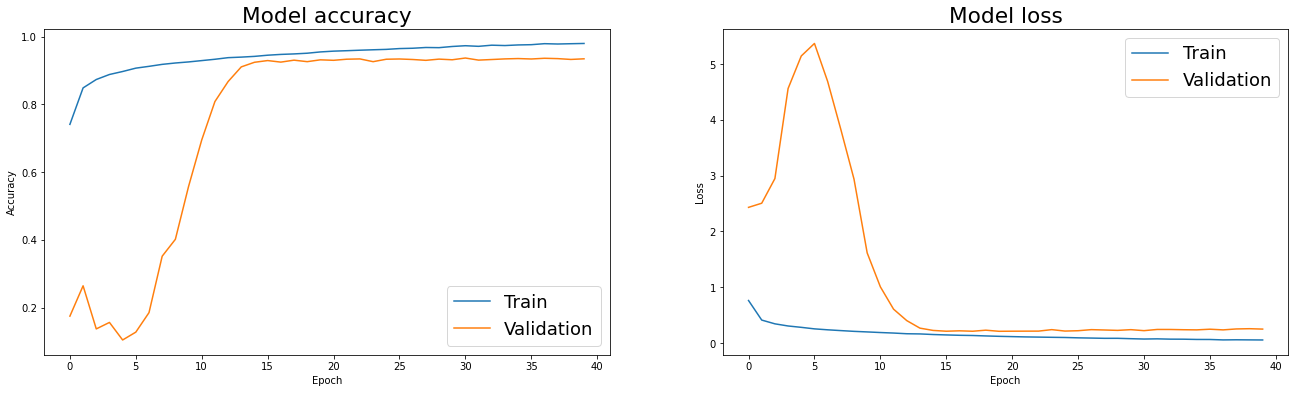

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

In [22]:
score = cnn_model.evaluate(X_test, y_test)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

313/313 [==============================] - 8s 24ms/step - loss: 0.2394 - accuracy: 0.9368

Test loss: 0.239392, Test accuracy: 0.936800


#### Predictions for the test data

In [23]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

array([9.9999881e-01, 5.0363706e-13, 1.3466722e-08, 4.0154546e-08,
       3.1766037e-10, 1.5971890e-15, 1.1761365e-06, 1.4024729e-14,
       4.3448811e-08, 1.2503055e-14], dtype=float32)

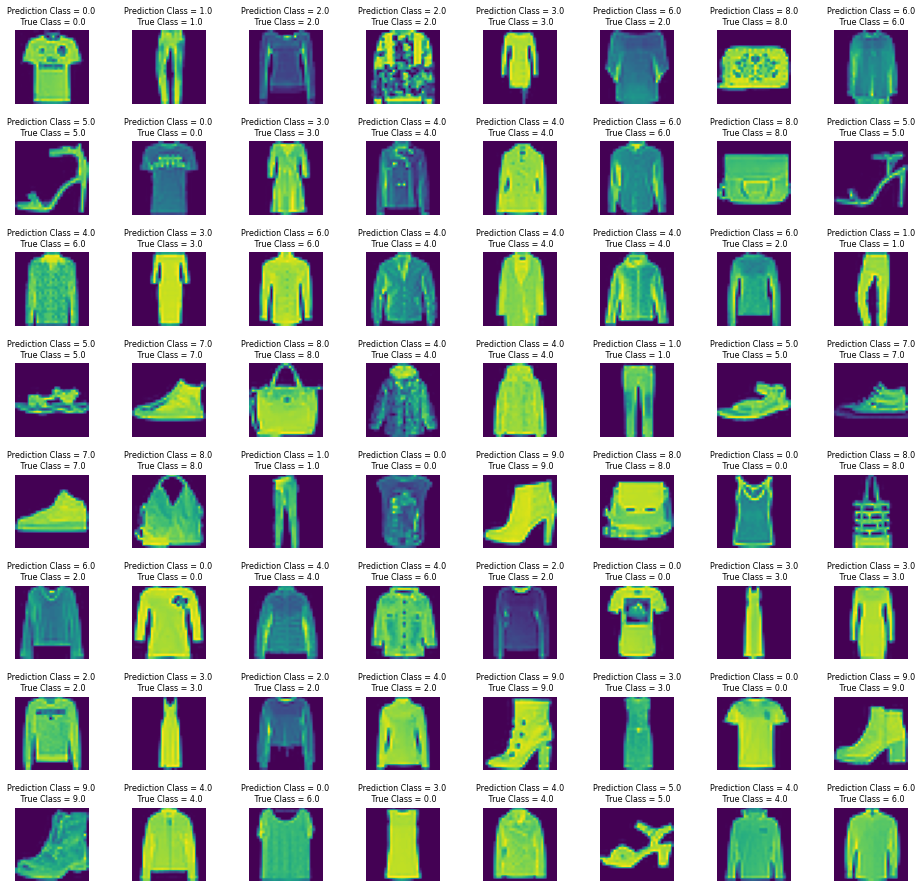

In [25]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (16,16))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.01f}\n True Class = {y_test[i]:0.01f}",fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.6)

In [26]:
score = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.2394 - accuracy: 0.9368
